In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Occupancy_Estimation.csv')
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [49]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [50]:
df['Time'] = pd.to_timedelta(df['Time'])
Hour = df['Time'].dt.components['hours']
Minute = df['Time'].dt.components['minutes']
df['Time'] = Hour * 60 + Minute

In [51]:
df.drop(['Date'], axis=1, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  10129 non-null  int64  
 1   S1_Temp               10129 non-null  float64
 2   S2_Temp               10129 non-null  float64
 3   S3_Temp               10129 non-null  float64
 4   S4_Temp               10129 non-null  float64
 5   S1_Light              10129 non-null  int64  
 6   S2_Light              10129 non-null  int64  
 7   S3_Light              10129 non-null  int64  
 8   S4_Light              10129 non-null  int64  
 9   S1_Sound              10129 non-null  float64
 10  S2_Sound              10129 non-null  float64
 11  S3_Sound              10129 non-null  float64
 12  S4_Sound              10129 non-null  float64
 13  S5_CO2                10129 non-null  int64  
 14  S5_CO2_Slope          10129 non-null  float64
 15  S6_PIR             

In [53]:
df.isnull().sum()

Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
Month                   0
Day                     0
dtype: int64

In [54]:
df['Day'].value_counts()

Day
23    2779
25    1716
22    1462
24    1064
26    1063
11    1048
10     997
Name: count, dtype: int64

<Axes: >

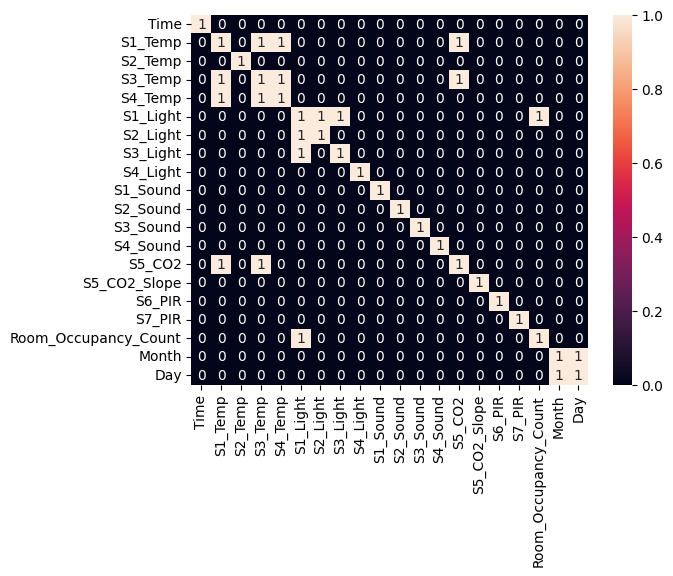

In [58]:
sns.heatmap(df.corr() > 0.8, annot=True)